## Scenario 4 - Investment Type

Given File 'startup_funding.csv'
#### Problem Statement :
1. There are 4 different type of investments. Find out percentage of amount funded for each investment type.
2. Plot a pie chart to visualise.
3. Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
#### Note:
1. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". 
2. Keep an eye for any spelling mistake. You can find this by printing unique values from this column.
3. Print the investment type in descending order with respect to the percentage of the amount funded.
### Output Format :
#### city1 percent1
#### city2 percent2
#### city3 percent3
#### . . . 
#### . . .
#### . . .



In [25]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [26]:
investment_type = {}

types_of_investments = []
amount = []

df.AmountInUSD.fillna('', inplace = True)
df.InvestmentType.fillna('', inplace = True)

for i in df.AmountInUSD:
    currAmt = ''
    if i == '':
        amount.append('0')
        continue
    a = i.split(',')
    for j in a:
        currAmt += j
        
    amount.append(currAmt)
    
for i in df.InvestmentType:
    types_of_investments.append(i)
    
for i in range(len(amount)):
    current_type = types_of_investments[i]
    investment_type[current_type] = investment_type.get(current_type, 0) + int(float(amount[i]))

investment_type

{'Private Equity': 18006085000,
 'Seed Funding': 322338108,
 'Debt Funding': 7800000,
 '': 0,
 'SeedFunding': 10007600,
 'PrivateEquity': 1000000,
 'Crowd funding': 125000,
 'Crowd Funding': 30768}

### Now, we need to remove the '' value and correct the spelling mistakes as well

In [27]:
df.InvestmentType.replace("Crowd funding", "Crowd Funding", inplace = True)
df.InvestmentType.replace("SeedFunding", "Seed Funding", inplace = True)
df.InvestmentType.replace("PrivateEquity", "Private Equity", inplace = True)



In [28]:
investment_type = {}

types_of_investments = []
amount = []

df.AmountInUSD.fillna('', inplace = True)
df.InvestmentType.fillna('', inplace = True)

for i in df.AmountInUSD:
    currAmt = ''
    if i == '':
        amount.append('0')
        continue
    a = i.split(',')
    for j in a:
        currAmt += j
        
    amount.append(currAmt)
    
for i in df.InvestmentType:
    types_of_investments.append(i)
    
for i in range(len(amount)):
    current_type = types_of_investments[i]
    investment_type[current_type] = investment_type.get(current_type, 0) + int(float(amount[i]))

investment_type.pop('')

investment_type

{'Private Equity': 18007085000,
 'Seed Funding': 332345708,
 'Debt Funding': 7800000,
 'Crowd Funding': 155768}

In [35]:
x = []
y = []

total = 0
for key in investment_type:
    total += investment_type[key]

for key in investment_type:
    x.append(key)
    y.append((investment_type[key] / total) * 100)
    
for i in range(4):
    print(x[i], " ", round(y[i], 2))

Private Equity   98.15
Seed Funding   1.81
Debt Funding   0.04
Crowd Funding   0.0


### Making a Pie Chart

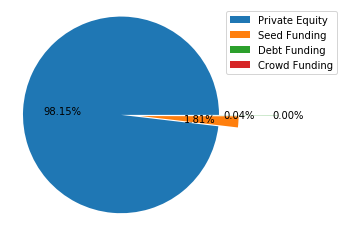

In [36]:
plt.pie(y, explode = [0.1, 0.1, 0.5, 1], autopct = "%.2f%%")
plt.axis("equal")
plt.legend(x)
plt.show()